<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
!unzip /content/archive_lab4.zip
!rm /content/archive_lab4.zip

Archive:  /content/archive_lab4.zip
  inflating: groceries - groceries.csv  
  inflating: groceries.csv           


In [1]:
import pandas as pd

#Загрузка данных:

In [2]:
all_data = pd.read_csv('groceries - groceries.csv')
all_data.head() #Видно, что датафрейм содержит NaN значения

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [4]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)  

In [5]:
print(f"Кол-во уникальных элементов: {len(unique_items)}\nСами уникальные элементы:\n{unique_items}")

Кол-во уникальных элементов: 169
Сами уникальные элементы:
{'brandy', 'finished products', 'syrup', 'cling film/bags', 'jam', 'kitchen towels', 'cocoa drinks', 'baby food', 'bathroom cleaner', 'hard cheese', 'cat food', 'cleaner', 'white wine', 'cream', 'house keeping products', 'soda', 'liquor (appetizer)', 'canned vegetables', 'dog food', 'kitchen utensil', 'candy', 'canned fish', 'softener', 'packaged fruit/vegetables', 'canned fruit', 'sausage', 'zwieback', 'shopping bags', 'long life bakery product', 'sugar', 'ketchup', 'nuts/prunes', 'sound storage medium', 'turkey', 'condensed milk', 'tropical fruit', 'bottled beer', 'rice', 'whipped/sour cream', 'sparkling wine', 'domestic eggs', 'mustard', 'hair spray', 'baking powder', 'potato products', 'yogurt', 'skin care', 'specialty vegetables', 'liquor', 'frozen vegetables', 'specialty cheese', 'coffee', 'flower (seeds)', 'misc. beverages', 'organic products', 'specialty bar', 'snack products', 'salty snack', 'napkins', 'rubbing alcohol

#FPGrowth и FPMax

In [6]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [7]:
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(data, min_support=0.03, use_colnames=True)
print(result)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.058566                          (margarine)
2   0.139502                             (yogurt)
3   0.104931                     (tropical fruit)
4   0.058058                             (coffee)
..       ...                                  ...
58  0.033249                 (pastry, whole milk)
59  0.047382  (root vegetables, other vegetables)
60  0.048907        (root vegetables, whole milk)
61  0.030605                (sausage, rolls/buns)
62  0.032232     (whipped/sour cream, whole milk)

[63 rows x 2 columns]


In [8]:
result["itemsets_len"] = result["itemsets"].apply(lambda x: len(x))

length_itemsets = set(result["itemsets_len"])

for length in length_itemsets:
    length_result = result[(result['itemsets_len'] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result["support"])}, максимальное значение: {max(length_result["support"])}')

При длине 1 минимальное значение: 0.03040162684290798, максимальное значение: 0.25551601423487547
При длине 2 минимальное значение: 0.030096593797661414, максимальное значение: 0.07483477376715811


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from mlxtend.frequent_patterns import fpmax

result_fpmax = fpmax(data, min_support=0.03, use_colnames=True)
print(result_fpmax)

result_fpmax["itemsets_len"] = result_fpmax["itemsets"].apply(lambda x: len(x))

length_itemsets_fpmax = set(result["itemsets_len"])

for length in length_itemsets_fpmax:
    length_result_fpmax = result_fpmax[(result_fpmax["itemsets_len"] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result_fpmax["support"])}, максимальное значение: {max(length_result_fpmax["support"])}')

     support                             itemsets
0   0.030402                (specialty chocolate)
1   0.031012                             (onions)
2   0.032944                   (hygiene articles)
3   0.033249                            (berries)
4   0.033249                     (hamburger meat)
5   0.033452                           (UHT-milk)
6   0.033859                              (sugar)
7   0.037112                            (dessert)
8   0.037417           (long life bakery product)
9   0.037824                        (salty snack)
10  0.038434                            (waffles)
11  0.039654                       (cream cheese)
12  0.042095                        (white bread)
13  0.042908                            (chicken)
14  0.048094                  (frozen vegetables)
15  0.049619                          (chocolate)
16  0.052364                            (napkins)
17  0.052466                               (beef)
18  0.053279                               (curd)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Разница между алгоритмами FPGrowth и FPMax заключается в том, что FPGrowth находит все частотные наборы объектов, удовлетворяющие заданному уровню поддержки, в то время как FPMax находит только максимальные частотные наборы. Максимальный частотный набор - это набор объектов, который не может быть расширен добавлением другого объекта и сохранением заданного уровня поддержки. 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


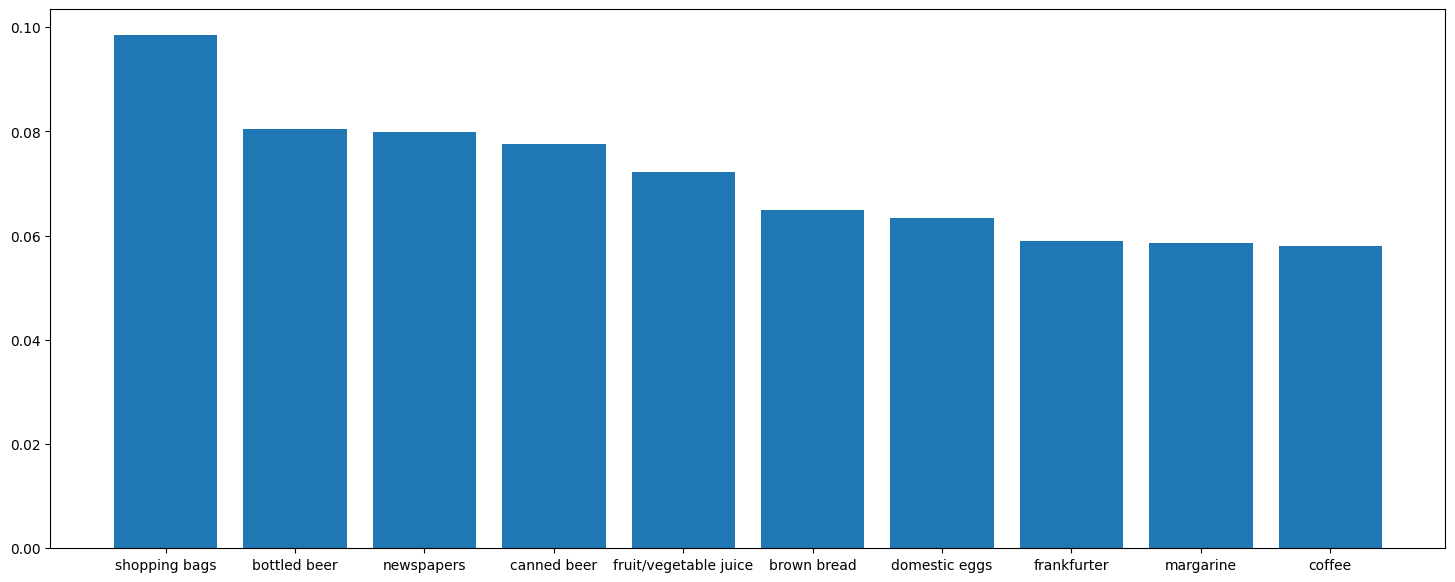

In [11]:
import matplotlib.pyplot as plt

result_fpmax_len1 = fpmax(data, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result_fpmax_len1["itemsets"]:
    items.append(*list(item))

for support in result_fpmax_len1["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(18, 7))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

In [13]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags',
'sausage',
'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer',
'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
te1 = TransactionEncoder()
te_ary1 = te1.fit(np_data).transform(np_data)
data1 = pd.DataFrame(te_ary1, columns=te1.columns_)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
result1 = fpgrowth(data1, min_support=0.03, use_colnames=True)
print(result1)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.139502                             (yogurt)
2   0.104931                     (tropical fruit)
3   0.255516                         (whole milk)
4   0.193493                   (other vegetables)
5   0.183935                         (rolls/buns)
6   0.080529                       (bottled beer)
7   0.110524                      (bottled water)
8   0.174377                               (soda)
9   0.088968                             (pastry)
10  0.108998                    (root vegetables)
11  0.077682                        (canned beer)
12  0.093950                            (sausage)
13  0.098526                      (shopping bags)
14  0.071683                 (whipped/sour cream)
15  0.057651                               (pork)
16  0.030503           (citrus fruit, whole milk)
17  0.056024                 (yogurt, whole milk)
18  0.034367                 (yogurt, rolls/buns)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


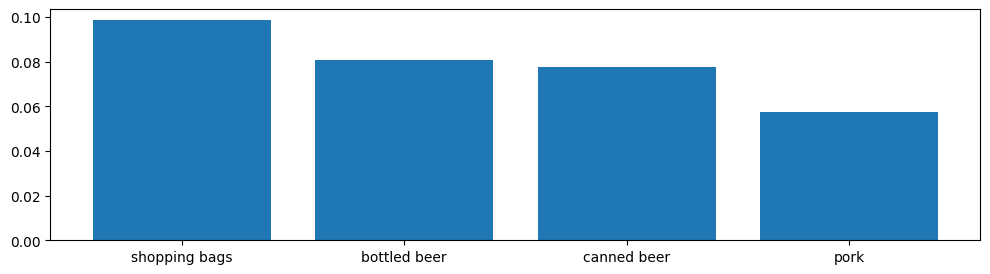

In [16]:
result2 = fpmax(data1, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result2["itemsets"]:
    items.append(*list(item))

for support in result2["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(12, 3))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

Общее кол-во наборов уменьшилось 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


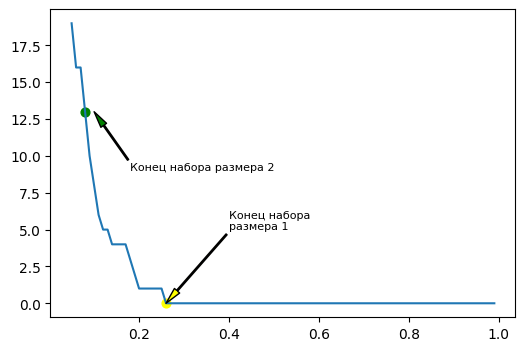

Уровень поддержки при котором перестают генерироваться наборы размера 2: 0.08000000000000000340005801292
Уровень поддержки при котором перестают генерироваться наборы размера 1: 0.2600000000000000071470607208


In [18]:
from decimal import Decimal

import matplotlib.pyplot as plt

start = Decimal(0.05)
support = []
length = []
max_len = []
while start <= 1:
    support.append(start)

    results = fpgrowth(data1, min_support=start, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))

    length.append(len(results))
    if len(results) > 0:
        max_len.append(max(results['length']))

    start += Decimal(0.01)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(support, length)

ax.scatter(support[max_len.index(1)], length[max_len.index(1)], color='green', s=40, marker='o')
ax.annotate('Конец набора размера 2', xy=(support[max_len.index(1)] + Decimal(0.02), length[max_len.index(1)]),
            xytext=(0.18, 9),
            fontsize=8, arrowprops=dict(facecolor='green', width=1, headwidth=5))

ax.scatter(support[len(max_len)], length[len(max_len)], color='yellow', s=40, marker='o')
ax.annotate('Конец набора\nразмера 1', xy=(support[len(max_len)], length[len(max_len)]), xytext=(0.4, 5),
            fontsize=8, arrowprops=dict(facecolor='yellow', width=1, headwidth=5))

plt.show()

print(f'Уровень поддержки при котором перестают генерироваться наборы размера 2: {support[max_len.index(1)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 1: {support[len(max_len)]}')

#Ассоциативные правила

In [19]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in
items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


1. antecedents: это набор элементов, который является предшествующим условием в ассоциативном правиле.
2. consequents: это набор элементов, который является следствием в ассоциативном правиле.
3. antecedent support: это процент транзакций, содержащих предшествующий набор элементов.
4. consequent support: это процент транзакций, содержащих следствие набора элементов.
5. support: это процент транзакций, содержащих и предшествующий, и следующий наборы элементов.
6. confidence: это вероятность, что следствие набора элементов будет куплено при условии, что предшествующий набор элементов уже был куплен.
7. lift: это мера того, насколько более вероятно, что следствие набора элементов будет куплено при условии, что предшествующий набор элементов уже был куплен, чем если бы они были случайно выбраны независимо друг от друга.
8. leverage: это мера того, насколько более вероятно, что следствие набора элементов будет куплено при условии, что предшествующий набор элементов уже был куплен, чем если бы они были случайно выбраны независимо друг от друга, но учитывая размер выборки.
9. conviction: это мера того, насколько более вероятно, что следствие набора элементов будет куплено при условии, что предшествующий набор элементов уже был куплен, чем если бы они были случайно выбраны независимо друг от друга, но учитывая силу связи между ними.


Расчет производится на основе метрике confidence

In [22]:
from statistics import mean, median

import numpy as np

result = fpgrowth(data, min_support=0.04, use_colnames=True)
rules = association_rules(result, min_threshold=0.1, metric='confidence')

print(f'Среднее значение параметра confidence: {mean(rules["confidence"])}')
print(f'Медиана параметра confidence: {median(rules["confidence"])}')
print(f'СКО параметра confidence: {np.std(rules["confidence"])}')
rules

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Среднее значение параметра confidence: 0.2829052726691693
Медиана параметра confidence: 0.23824809507666894
СКО параметра confidence: 0.09174103324706069


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [23]:
rules = association_rules(result, min_threshold=0.01, metric='support')

print(f'Среднее значение параметра support: {mean(rules["support"])}')
print(f'Медиана параметра support: {median(rules["support"])}')
print(f'СКО параметра support: {np.std(rules["support"])}')

rules

Среднее значение параметра support: 0.050240072304129246
Медиана параметра support: 0.047381799694966954
СКО параметра support: 0.010332111871899625


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [24]:
rules = association_rules(result, min_threshold=0.01, metric='leverage')

print(f'Среднее значение параметра leverage: {mean(rules["leverage"])}')
print(f'Медиана параметра leverage: {median(rules["leverage"])}')
print(f'СКО параметра leverage: {np.std(rules["leverage"])}')

rules

Среднее значение параметра leverage: 0.020838559154364243
Медиана параметра leverage: 0.02071778653838151
СКО параметра leverage: 0.004059627576864452


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
9,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941


In [25]:
rules = association_rules(result, min_threshold=0.01, metric='conviction')

print(f'Среднее значение параметра conviction: {mean(rules["conviction"])}')
print(f'Медиана параметра conviction: {median(rules["conviction"])}')
print(f'СКО параметра conviction: {np.std(rules["conviction"])}')

rules

Среднее значение параметра conviction: 1.140331125249048
Медиана параметра conviction: 1.1057966943491302
СКО параметра conviction: 0.11799021582624744


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
3,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [26]:
rules = association_rules(result, min_threshold=0.4, metric='confidence')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


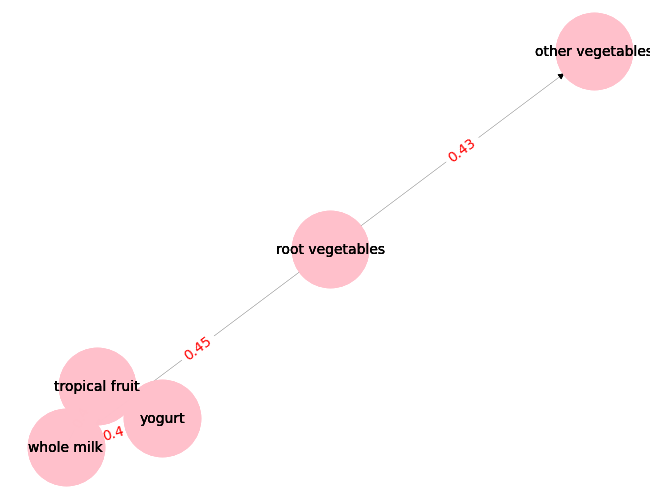

In [27]:
import networkx as nx

antecedents = rules["antecedents"]
consequents = rules["consequents"]
confidence = rules["confidence"]
supports = rules["support"]

edges = []
dict_labels = {}

for i in range(len(antecedents)):
    edges.append([str(list(antecedents[i])[0]), str(list(consequents[i])[0])])
    dict_labels[(str(list(antecedents[i])[0]), str(list(consequents[i])[0]))] = round(confidence[i], 2)

G = nx.DiGraph()
for i in edges:
    G.add_nodes_from(i)
    G.add_edges_from([tuple(i)])

pos = nx.spring_layout(G)
plt.figure()
for i in range(len(dict_labels.items())):
    nx.draw(
        G, pos, edge_color='black', width=round(supports[i], 2), linewidths=1,
        node_size=3000, node_color='pink', alpha=0.9, font_size=10,
        labels={node: node for node in G.nodes()})

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=dict_labels,
    font_color='red'
)

plt.axis('off')
plt.show()

Из полученного графа можно четко увидеть связи между антецедентами и консеквентами и уровень поддержки между ними.
